In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('insurance (1) (1) (1).xlsx')
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
print(df.isnull().sum())
print(df.describe())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [4]:
bmi_male = df[df['sex'] == 'male']['bmi']
bmi_female = df[df['sex'] == 'female']['bmi']

In [5]:
t_stat, p_value = stats.ttest_ind(bmi_male, bmi_female, equal_var=False)
print(f'T-statistic: {t_stat:.4f}')

T-statistic: 1.6970


In [6]:
print(f'P-value: {p_value:.4f}')
print(f'Mean BMI (Male): {bmi_male.mean():.2f}')

P-value: 0.0899
Mean BMI (Male): 30.94


In [7]:
print(f'Mean BMI (Female): {bmi_female.mean():.2f}')

Mean BMI (Female): 30.38


In [8]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='bmi', ylabel='Count'>

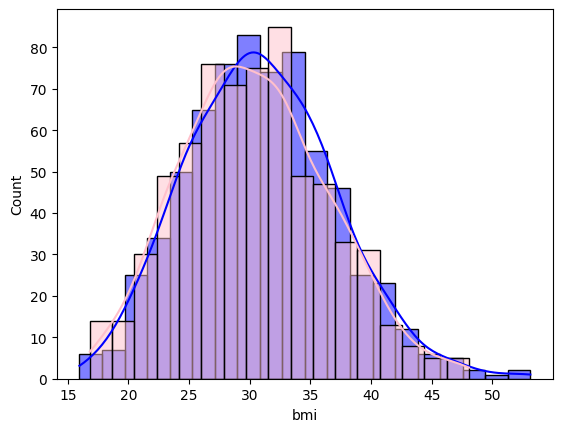

In [9]:
sns.histplot(bmi_male, color='blue', label='Male', kde=True, alpha=0.5)
sns.histplot(bmi_female, color='pink', label='Female', kde=True, alpha=0.5)

C:\Users\devanshu.singh\AppData\Local\Temp\ipykernel_21284\282429036.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


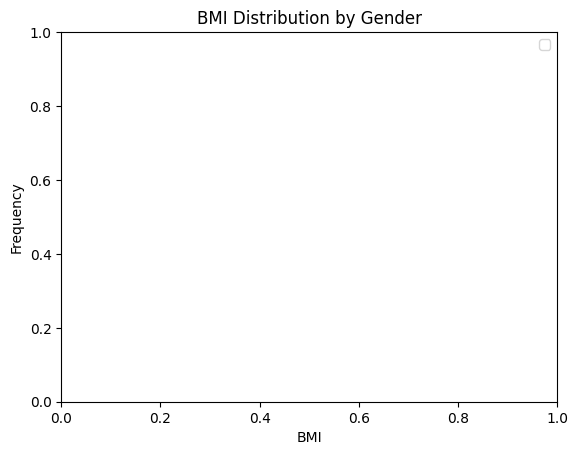

In [10]:
plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

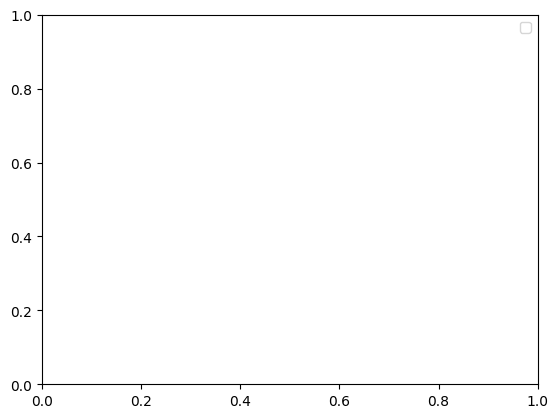

In [12]:
plt.legend(labels=['Male', 'Female'])
plt.show()

In [14]:
contingency_table = pd.crosstab(df['sex'], df['smoker'])
print(contingency_table)

smoker   no  yes
sex             
female  547  115
male    517  159


In [15]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2_stat:.4f}')
print(f'P-value: {p_value:.4f}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

Chi-square Statistic: 7.3929
P-value: 0.0065
Degrees of Freedom: 1
Expected Frequencies:
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


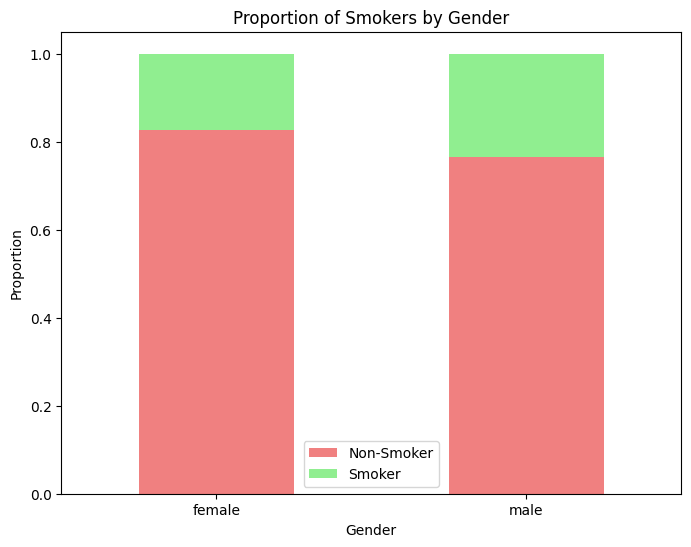

In [16]:
smoker_proportions = df.groupby('sex')['smoker'].value_counts(normalize=True).unstack()
smoker_proportions.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'lightgreen'])
plt.title('Proportion of Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(['Non-Smoker', 'Smoker'])
plt.xticks(rotation=0)
plt.show()